<a href="https://colab.research.google.com/gist/jdrapala/cb1f25bc798e16c59fa29271150e2624/widzenie_komputerowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
dataset = sns.load_dataset('mpg')[['mpg','horsepower', 'cylinders']].dropna()

Warstwa gęsta `Dense`: $\overline{Y} = \phi(XA^T)$ 

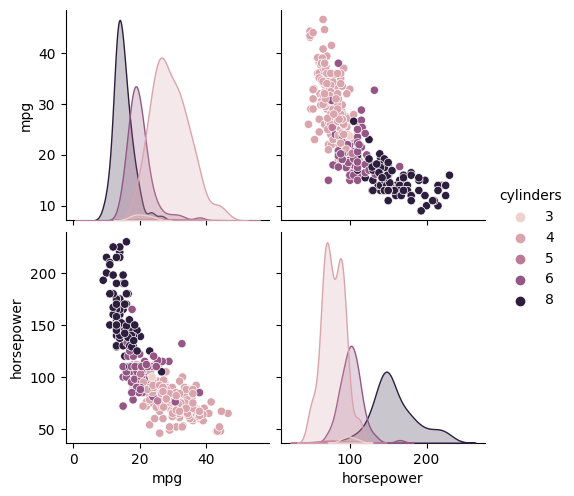

In [4]:
sns.pairplot(data=dataset, hue='cylinders') # mpg - mile per gallon

In [5]:
Xname, Yname = 'mpg', 'horsepower' 
X = dataset[Xname].to_numpy('float32')
Y = dataset[Yname].to_numpy('float32')

In [6]:
X = np.expand_dims(X, axis=1)
Y = np.expand_dims(Y, axis=1)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [8]:
from sklearn.preprocessing import StandardScaler

scalerX = StandardScaler().fit(X_train)
scalerY = StandardScaler().fit(Y_train)
scX_train = scalerX.transform(X_train) 
scY_train = scalerY.transform(Y_train)
scX_test = scalerX.transform(X_test) 
scY_test = scalerY.transform(Y_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [13]:
nn = Sequential([
    Dense(units=5, activation='sigmoid', input_shape=(1,)),
    Dense(units=1)
])

nn.compile(
    optimizer='adam', 
    loss='mse',
    )

history = nn.fit(scX_train, scY_train, 
       epochs=100, 
       validation_data=(scX_test,scY_test),
       verbose=1
       )



<AxesSubplot: >

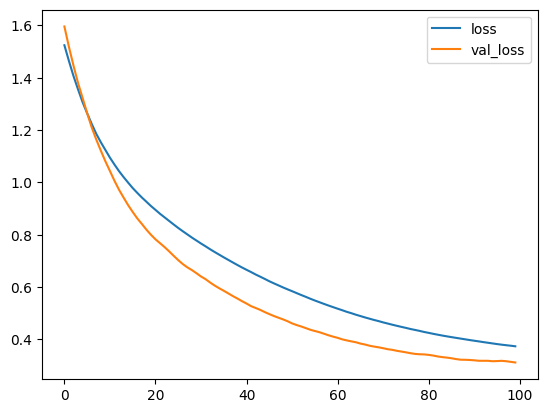

In [14]:
pd.DataFrame(history.history).plot()

In [15]:
nn.evaluate(scX_test, scY_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.3115


0.3114645481109619

In [16]:
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 5)                 10        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


In [17]:
from tensorflow.keras.utils import plot_model

In [18]:
plot_model(nn, show_shapes=True, show_layer_names=True, show_layer_activations=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [19]:
a, b = nn.layers[0].get_weights()
a

array([[ 1.7998742 , -0.47263   , -1.527692  , -0.2777602 ,  0.13224193]],
      dtype=float32)

In [20]:
b

array([ 0.49659342, -0.18975602, -0.35995287, -0.19825616,  0.24648531],
      dtype=float32)

In [21]:
scY_pred = nn.predict(scX_test)

4/4 [==============================] - 0s 3ms/step


Text(0, 0.5, 'horsepower')

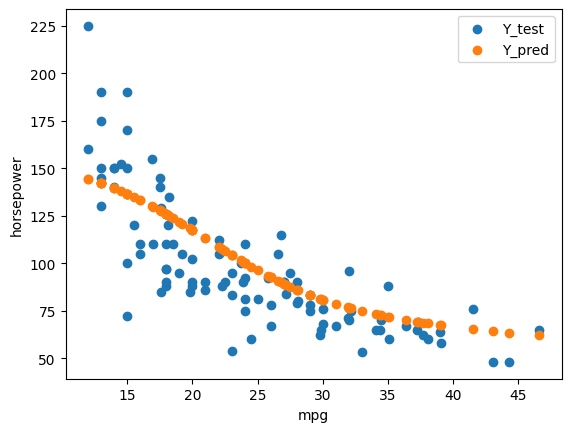

In [23]:
plt.scatter(X_test, Y_test)
plt.scatter(X_test, scalerY.inverse_transform(scY_pred))
plt.legend(['Y_test', 'Y_pred'])
plt.xlabel(Xname)
plt.ylabel(Yname)

In [24]:
from tensorflow.keras.datasets import fashion_mnist
fmnist = fashion_mnist.load_data()

In [25]:
(X_train, C_train), (X_test, C_test) = fmnist
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [26]:
X_test.shape, C_test.shape

((10000, 28, 28), (10000,))

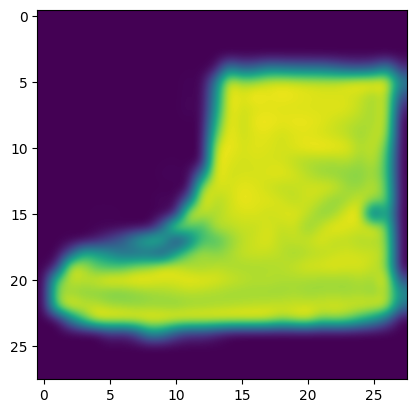

In [27]:
plt.imshow(X_train[46136], interpolation='bicubic')

In [28]:
C_train[46136]

9

In [29]:
X_test.shape

(10000, 28, 28)

In [30]:
from tensorflow.keras.layers import Dense, Flatten

nn = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(units=128, activation='relu'),
    Dense(units=10, activation='softmax')
])

nn.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    )

history = nn.fit(X_train, C_train,
                  epochs=15,
                  validation_data=(X_test, C_test),
                  ### callbacks=[]
       #verbose=0
       )

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5029 - val_loss: 0.4295
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3773 - val_loss: 0.3859
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3363 - val_loss: 0.3658
Epoch 4/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3131 - val_loss: 0.3684
Epoch 5/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2951 - val_loss: 0.3564
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2801 - val_loss: 0.3344
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2672 - val_loss: 0.3444
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2570 - val_loss: 0.3449
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2472 - val_loss: 0.3333
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.238

<AxesSubplot: >

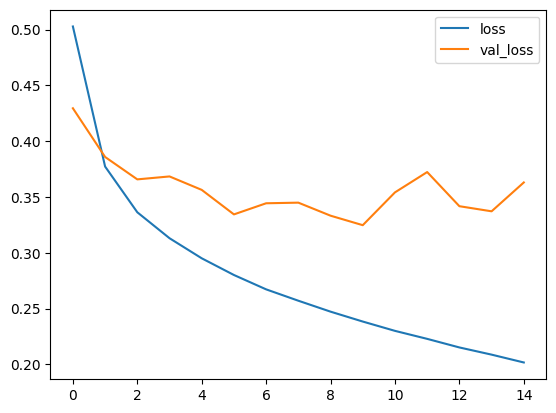

In [31]:
pd.DataFrame(history.history).plot()

313/313 [==============================] - 1s 3ms/step


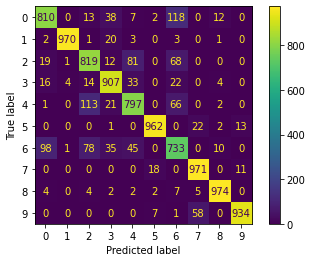

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

C_pred = np.argmax(nn.predict(X_test), axis=1)
cm = confusion_matrix(C_test, C_pred, labels=np.unique(C_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=np.unique(C_test))
disp.plot()

### Sieć splotowa

In [10]:
from tensorflow.keras.datasets import cifar10
cifar = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [12]:
(X_train, C_train), (X_test, C_test) = cifar
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_test.shape, C_test.shape

((10000, 32, 32, 3), (10000, 1))

In [36]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.models import Sequential

Wywołania zwrotne (ang. *callbacks**): 
* `ModelCheckpoint` `('plik.h5', save_best_only=True)`
* `EarlyStopping` `(patience=6)`

In [37]:
nn = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', 
           input_shape=X_train.shape[1:]),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Flatten(),
    Dense(units=128, activation='relu'),
    Dense(units=10, activation='softmax')
])

nn.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    # callbacks=[]
    )



ValueError: Input 0 of layer "conv2d_4" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (None, 28, 28)

In [23]:
nn.layers

In [24]:
history = nn.fit(X_train, C_train,
                  epochs=15,
                  validation_data=(X_test, C_test),
                  ### callbacks=[]
       #verbose=0
       )

Epoch 1/15
1563/1563 [==============================] - 106s 67ms/step - loss: 1.3677 - val_loss: 1.0812
Epoch 2/15
1563/1563 [==============================] - 109s 70ms/step - loss: 0.9901 - val_loss: 0.9447
Epoch 3/15
1563/1563 [==============================] - 105s 67ms/step - loss: 0.8442 - val_loss: 0.9150
Epoch 4/15
1563/1563 [==============================] - 106s 68ms/step - loss: 0.7447 - val_loss: 0.8840
Epoch 5/15
1563/1563 [==============================] - 109s 70ms/step - loss: 0.6619 - val_loss: 0.8523
Epoch 6/15
1563/1563 [==============================] - 105s 67ms/step - loss: 0.5857 - val_loss: 0.8704
Epoch 7/15
1563/1563 [==============================] - 106s 68ms/step - loss: 0.5140 - val_loss: 0.9167
Epoch 8/15
1563/1563 [==============================] - 119s 76ms/step - loss: 0.4433 - val_loss: 0.9306
Epoch 9/15
1563/1563 [==============================] - 122s 78ms/step - loss: 0.3843 - val_loss: 1.0045
Epoch 10/15
1563/1563 [==============================] 

In [ ]:
# Popracuj na tym za tydzień
nn2 = Sequential([nn.layers[:-1]])
nn2.add(Dense(units=10, activation='softmax'))

## ? nn_old = tf.keras.models.clone_model(nn)
## ? nn_old.set_weights(nn.get_weights())
for warstwa in nn2.layers[:-1]:
  warstwa.trainable = False

nn2.compile
nn2.fit

for warstwa in nn2.layers[:-1]:
  warstwa.trainable = True

nn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
    loss='sparse_categorical_crossentropy',
    )


In [ ]:
# do sprawdzenia
nn.save('moja_siec.h5')

#from tf.keras.models import load_model
#nn_wczytane = load_model('moja_siec.h5')

In [26]:
type(nn.layers)

list